In [1]:
import math
import torch
import ntwrk
from ntwrk.bayesopt import BayesOpt, expected_improvement, max_mean

import gym
import sys
sys.path.append("../ntwrk/gym/")
import network_sim
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'ntwrk'

In [2]:
env = gym.make("PccNs-v0")
env.reset()

History length: 10
Features: ['sent latency inflation', 'latency ratio', 'send ratio']
Getting min obs for ['sent latency inflation', 'latency ratio', 'send ratio']
Reward: 0.00, Ewma Reward: 0.00


/home/vagrant/.local/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


array([0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.])

## Let's Try Bayesian Optimization

#### Make Network

In [3]:
env = gym.make("PccNs-v0")
env.reset()

History length: 10
Features: ['sent latency inflation', 'latency ratio', 'send ratio']
Getting min obs for ['sent latency inflation', 'latency ratio', 'send ratio']
Reward: 0.00, Ewma Reward: 0.00


/home/vagrant/.local/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


array([0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.])

#### set up phase

In [4]:
max_x = 1000
n_start = 3
rates = torch.rand(n_start)
rwrds = torch.zeros(n_start)
for rind, rr in enumerate(rates):
    rwrds[rind] = env.step(rr.unsqueeze(0).mul(max_x))[1].item()
    


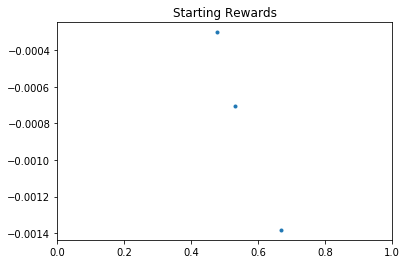

In [5]:
plt.plot(rates, rwrds, marker='.', linestyle="None")
plt.title("Starting Rewards")
plt.xlim(0, 1)
plt.show()

In [6]:
rates.mul(max_x)

tensor([475.5753, 531.4701, 667.7383])

In [7]:
bo = BayesOpt(rates.mul(max_x), rwrds, normalize=True, max_x=max_x, acquistion=expected_improvement,
             max_jump=300)

In [8]:
%pdb

Automatic pdb calling has been turned ON


In [10]:
rnds = 10
saved_rwrds = torch.zeros(rnds)
test_points = torch.arange(1, 1000).float().div(max_x)
for ii in range(rnds):
    bo.train_surrogate(iters=500, overwrite=True)
    next_rate = bo.acquire(explore=0.1).unsqueeze(0)
    print("next rate = ", next_rate)
    rwrd = torch.tensor(env.step(next_rate.mul(bo.max_x))[1]).unsqueeze(0)
    saved_rwrds[ii] = rwrd.item()
    bo.update_obs(next_rate, rwrd, max_obs=4)
    

next rate =  tensor([586.3312])
next rate =  tensor([530.5524])
next rate =  tensor([715.9795])
next rate =  tensor([885.5437])
next rate =  tensor([585.5437])
next rate =  tensor([526.7498])
next rate =  tensor([226.7498])
next rate =  tensor([521.4557])
next rate =  tensor([586.2799])
next rate =  tensor([587.7875])


In [13]:
torch.save("saved_rwrds.pt", saved_rwrds)

AttributeError: 'Tensor' object has no attribute 'flush'

> /home/vagrant/.local/lib/python3.6/site-packages/torch/serialization.py(207)__exit__()
    205 class _open_buffer_writer(_opener):
    206     def __exit__(self, *args):
--> 207         self.file_like.flush()
    208 
    209 

ipdb> q
